## Building a Convolutional Neural Network on the MNIST dataset




In [10]:

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import keras
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
from sklearn.model_selection import train_test_split
import tensorflow as tf
import torch
from keras.layers import BatchNormalization



train_set_raw = pd.read_csv("C:\\Users\\Andrew\\Desktop\\472_CNN\\mnist_train.csv")
test_set_raw = pd.read_csv("C:\\Users\\Andrew\\Desktop\\472_CNN\\mnist_test.csv")

data_set = pd.concat([train_set_raw, test_set_raw])


### Exploring the Data

Looking through shape and content of the dataset to begin to formulate a plan of which model will be the most appropriate. Also visualzing a few of the instances to see if any anomalies or abonormalities exist. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


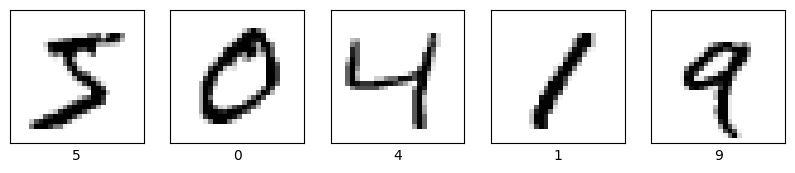

In [20]:
train_set_raw.info()
test_set_raw.info()

train_set_raw.describe()
# Label will be our target variable. (True Numeric representation of the 28x28 pixel matrix)

# Reshape the images
images = train_set_raw.drop('label', axis=1).values.reshape(-1, 28, 28)

# Display the first five images
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(train_set_raw['label'].iloc[i])
plt.show()


## Dataset Splitting
For this excercise, the features are simply the 28x28 arrays of pixels and the target is the label column taken from the dataset, which represents the ground truth of the actual numerical value that the the pixel matrix represnts. 


In [12]:
# FEATURE SET REPRESNETS THE ENTIRE DATASET, Should refactor this to be more clear


labels = data_set.iloc[:, 0]
features = data_set.iloc[:, 1:]

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=42)

# Convert to numpy arrays
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Reshape the pixel values
img_rows, img_cols = 28, 28

if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    inpx = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    inpx = (img_rows, img_cols, 1)

# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]


### Converting the class vectors into binary class matrices (one-hot encoding)
The function to_categorical from Keras is used for this purpose. It takes two arguments: the class vector to be converted into a matrix (y_train and y_test), and the total number of classes (num_classes).

The resulting binary matrix representation of the class vector is used in the model training process when the loss function is categorical_crossentropy.

In [13]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

### Choosing my Model Archiecture (CNN)

Even though it was not explicitly required for this assignment, I wanted to try a Convolutional Neural Network<br>

The following layer types were used (in addition to the input and output layers) <br>
Convolutional Layers : layer1, layer2, layer5<br>
MaxPooling Layers : layer3, layer6<br>
Dropout Layers : layer3, layer6<br>
Flatten Layer : layer8<br>
Dense Layer :  layer 9<br>
Batch Normalization Layer : layer 10<br>

In [14]:

inpx = Input(shape=inpx)
layer1 = Conv2D(64, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(128, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(2, 2))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Conv2D(128, (3, 3), activation='relu')(layer4)
layer6 = MaxPooling2D(pool_size=(2, 2))(layer5)
layer7 = Dropout(0.5)(layer6)
layer8 = Flatten()(layer7)
layer9 = Dense(250, activation='relu')(layer8)
layer10 = BatchNormalization()(layer9)
layer11 = Dense(10, activation='softmax')(layer10)


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 43s 242ms/step - accuracy: 0.7643 - loss: 0.7471 - val_accuracy: 0.8631 - val_loss: 0.6222
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 45s 257ms/step - accuracy: 0.7724 - loss: 0.7214 - val_accuracy: 0.8666 - val_loss: 0.6031
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 45s 255ms/step - accuracy: 0.7817 - loss: 0.7056 - val_accuracy: 0.8708 - val_loss: 0.5842
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 44s 253ms/step - accuracy: 0.7898 - loss: 0.6744 - val_accuracy: 0.8741 - val_loss: 0.5673
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 44s 250ms/step - accuracy: 0.7979 - loss: 0.6493 - val_accuracy: 0.8776 - val_loss: 0.5519
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 45s 256ms/step - accuracy: 0.8052 - loss: 0.6355 - val_accuracy: 0.8802 - val_loss: 0.5362
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 42s 242ms/step - accuracy: 0.8096 - loss: 0.6202 - val_accuracy: 0.8829 - val_loss: 0.5220
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 41s 237ms/step - accuracy: 0.8174 - loss: 0

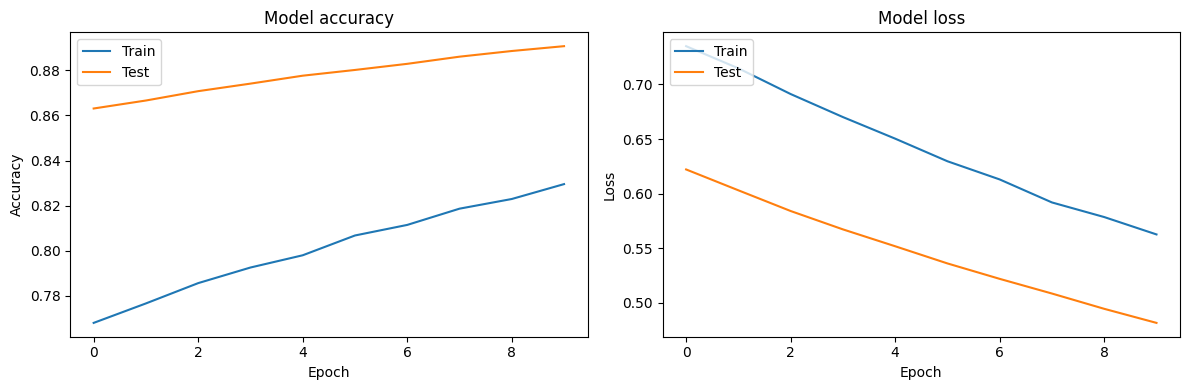

In [16]:
import matplotlib.pyplot as plt

torch.manual_seed(42)

model = Model([inpx], layer11)
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=200, validation_data=(x_test, y_test))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

At this point I was happy that the model was learning and performing well, so I supplemented additional epochs and continued to another run to see if the behavior continued. 

Epoch 1/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 44s 248ms/step - accuracy: 0.8356 - loss: 0.5500 - val_accuracy: 0.8931 - val_loss: 0.4696
Epoch 2/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 42s 240ms/step - accuracy: 0.8338 - loss: 0.5403 - val_accuracy: 0.8946 - val_loss: 0.4594
Epoch 3/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 42s 237ms/step - accuracy: 0.8440 - loss: 0.5181 - val_accuracy: 0.8971 - val_loss: 0.4469
Epoch 4/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 42s 238ms/step - accuracy: 0.8469 - loss: 0.5115 - val_accuracy: 0.8992 - val_loss: 0.4368
Epoch 5/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 42s 238ms/step - accuracy: 0.8503 - loss: 0.4978 - val_accuracy: 0.9009 - val_loss: 0.4272
Epoch 6/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 42s 239ms/step - accuracy: 0.8555 - loss: 0.4877 - val_accuracy: 0.9031 - val_loss: 0.4170
Epoch 7/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 42s 239ms/step - accuracy: 0.8635 - loss: 0.4693 - val_accuracy: 0.9050 - val_loss: 0.4079
Epoch 8/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 42s 240ms/step - accuracy: 0.8632 - loss: 0

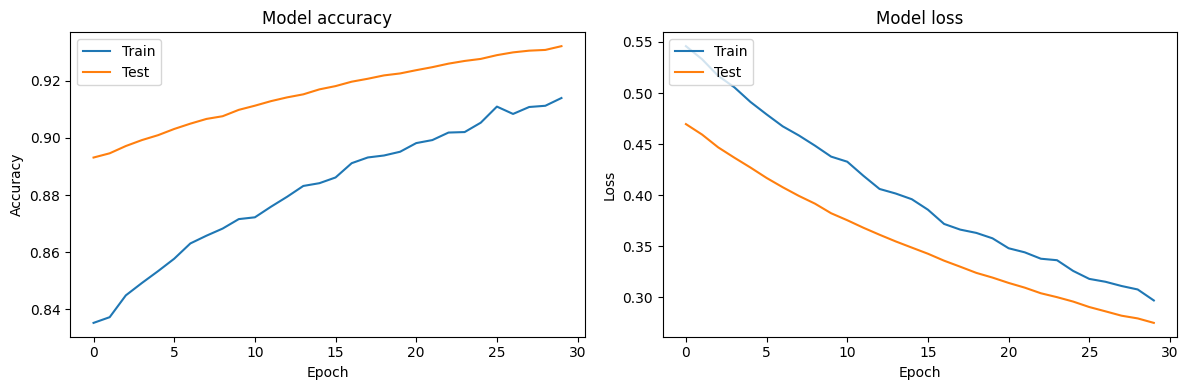

In [17]:
import matplotlib.pyplot as plt

torch.manual_seed(42)

model = Model([inpx], layer11)
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, batch_size=200, validation_data=(x_test, y_test))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

### Final Conclusions
<br>
I reached a final validated accuracy of approxiamtely 93%. The loss was continually decreasing so I predict that accuracy could still gain over time.<br>
I checked my performance against others who had chosen to directly implement the simpler version of a sequential neural netowrk which resembled something like this:<br>

![Sequential Network](sequential_network.png)
<br>
Objectively, this simpler model performed better than my implementation of a CNN. The main issue that my model had was very slow learning. When I first put this together, I tried to start with a batch size of 500 based on a similar implentation I had found, but that batch size proved too memory intensive so I had to lower it to 200. It is interesting to me that possibly more complicated archiectures come with a trade off of computational overhead, and this is why "simpler" approaches may work better, especially with limited resources. <br><br>
I beleive that with the implemntation of a grid-search or k nearest neighbors algorithm would help me adjust my paramters to optimze the performance of this CNN. 